In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Seasonality Decomposition

In [2]:
#reading the dataset
df = pd.read_csv('data/AirPassengers.csv')
df.index = pd.to_datetime(df.Month , format = '%Y-%m')
df.drop('Month',axis = 1, inplace = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


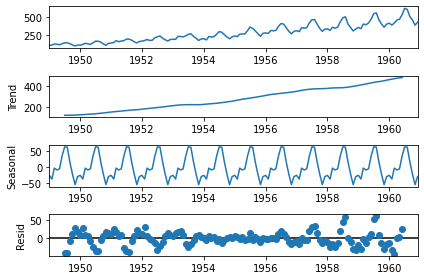

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

## 2. Check Stationarity

In [4]:
#reading the dataset
df = pd.read_csv('data/AirPassengers.csv')
df.index = pd.to_datetime(df.Month , format = '%Y-%m')
df.drop('Month',axis = 1, inplace = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


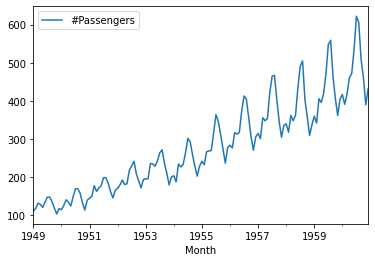

In [5]:
df.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df)
print('number of observation:', adftest[3], '\np-value:', adftest[1])

number of observation: 130 
p-value: 0.9918802434376411


## 3. Simple Moving Average

In [7]:
product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],
           'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}
df = pd.DataFrame(product)
df.set_index('month', inplace=True)

In [8]:
df['SMA_3'] = df['demand'].rolling(window=3).mean()
df['SMA_4'] = df['demand'].rolling(window=4).mean()

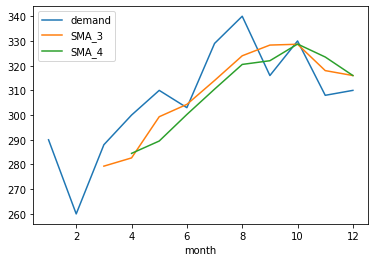

In [9]:
df.plot()

## 4. Simple Exponential Smoothing

In [10]:
df = pd.read_csv('data/AirPassengers.csv')
df.index = pd.to_datetime(df.Month , format = '%Y-%m')
df.drop('Month',axis = 1, inplace = True)

C:\Users\Wilson\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Wilson\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Holt-Winters Exponential Smoothing')

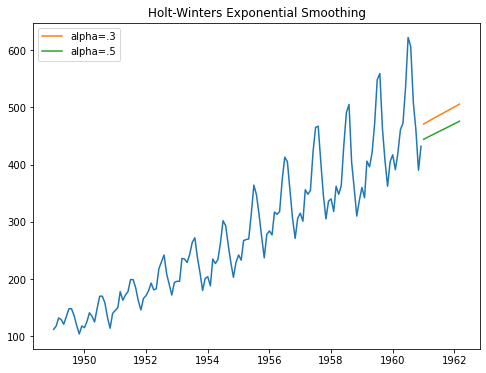

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
model1 = Holt(df).fit(smoothing_level=0.3)
model2 = Holt(df).fit(smoothing_level=0.5)
pred1 = model1.forecast(steps=15)
pred2 = model2.forecast(steps=15)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df)
ax.plot(pred1, label='alpha=.3')
ax.plot(pred2, label='alpha=.5')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing')

## 5. Holt-Winter Seasonal Smoothing

In [12]:
df = pd.read_csv('data/AirPassengers.csv')
df.index = pd.to_datetime(df.Month , format = '%Y-%m')
df.drop('Month',axis = 1, inplace = True)

C:\Users\Wilson\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Holt-Winters Seasonal Smoothing')

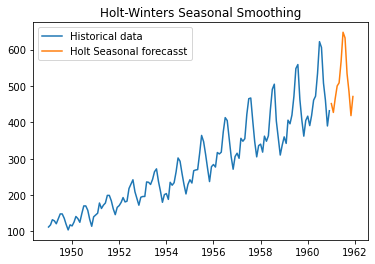

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df, trend="add",
                             seasonal="add",
                             seasonal_periods=12).fit()
pred1 = model.forecast(12)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df, label='Historical data')
ax.plot(pred1, label='Holt Seasonal forecasst')
plt.legend()
plt.title('Holt-Winters Seasonal Smoothing')

## 6. ARIMA

### 6.1 ACF and PACF

In [14]:
df = pd.read_csv('data/AirPassengers.csv')
df.index = pd.to_datetime(df.Month , format = '%Y-%m')
df.drop('Month',axis = 1, inplace = True)

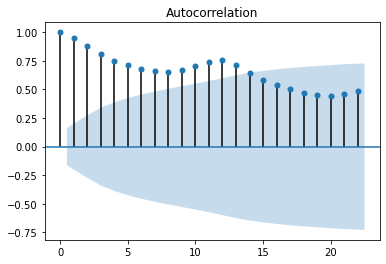

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)
plt.show()

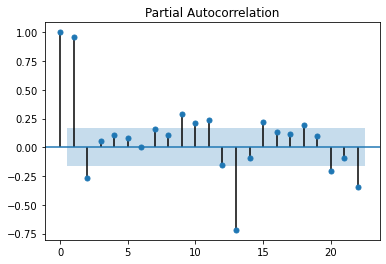

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df)
plt.show()

### 6.2 Arima Model

In [17]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(df, order=(2,1,1)).fit()
arima_model.summary()

C:\Users\Wilson\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Wilson\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.881
Date:                Fri, 19 Mar 2021   AIC                           1361.696
Time:                        11:00:13   BIC                           1376.510
Sample:                    02-01-1949   HQIC                          1367.716
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6695      0.132     20.185      0.000       2.410       2.929
ar.L1.D.#Passengers     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L2.D.#Passengers    -0.5104      0.072     -7.095      0.000      -0.651      -0.369
ma.L1.D.#Passengers    -1.0000      0.029    -34.129      0.000      -1.057      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0818           -0.8883j            1.3998           -0.1094
AR.2            1.0818           +0.8883j            1.3998            0.1094
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

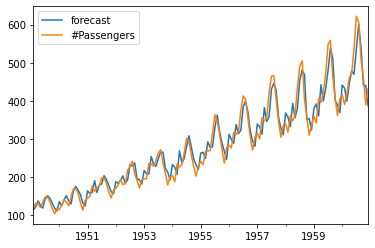

In [18]:
# in-sample prediction
arima_model.plot_predict()
plt.show()

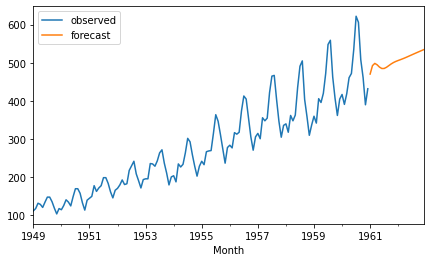

In [19]:
# out-of-sample prediction
pred = pd.DataFrame(data=arima_model.forecast(steps=24)[0],
                    index=pd.date_range('1961-01-01', periods=24, freq='M'))

ax = df.plot(figsize=(7, 4))
pred.plot(ax=ax)
ax.legend(labels=['observed', 'forecast'])
plt.show()

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_model = SARIMAX(df, order=(1,1,0),
                      seasonal_order=(1,1,0,12)).fit()
arima_model.summary()

C:\Users\Wilson\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Wilson\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -507.196
Date:                            Fri, 19 Mar 2021   AIC                           1020.393
Time:                                    11:00:14   BIC                           1029.019
Sample:                                01-01-1949   HQIC                          1023.898
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2965      0.082     -3.601      0.000      -0.458      -0.135
ar.S.L12      -0.1397      0.091     -1.540      0.124      -0.318       0.038
sigma2       134.7028     15.110      8.915      0.000     105.088     164.318
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.76
Prob(Q):                              0.94   Prob(JB):                         0.01
Heteroskedasticity (H):               2.63   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

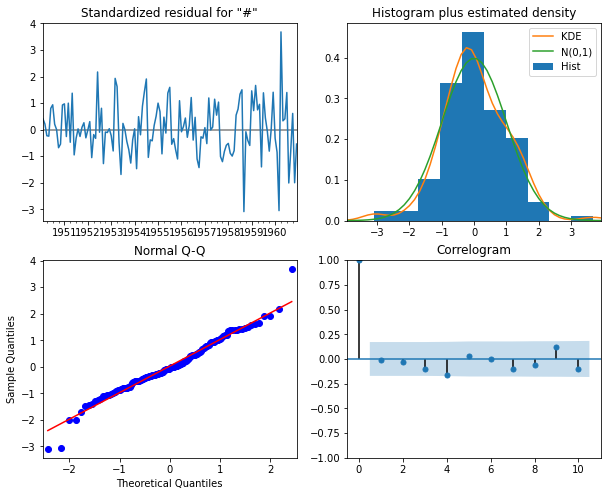

In [21]:
arima_model.plot_diagnostics(figsize=(10, 8))
plt.show()

In [22]:
pred = arima_model.get_prediction(start=pd.to_datetime('1961-01-01'),
                                  end=pd.to_datetime('1963-12-01'))

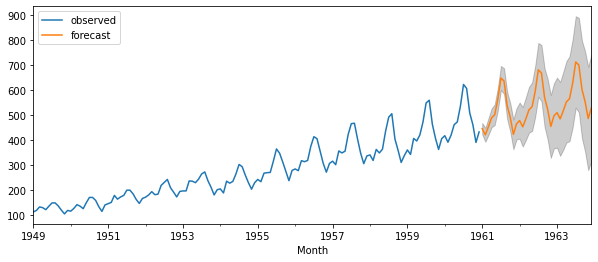

In [23]:
ax = df.plot(figsize=(10, 4))
pred.predicted_mean.plot(ax=ax)
ax.fill_between(pred.conf_int().index,
                pred.conf_int().iloc[:, 0],
                pred.conf_int().iloc[:, 1], color='k', alpha=.2)
plt.legend(loc=2, labels=['observed', 'forecast'])
plt.show()

### 6.3 Auto Arima Model

In [24]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(df, seasonal=True, m=12)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Fri, 19 Mar 2021   AIC                           1017.847
Time:                                     11:00:26   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.393
ma.L1         -0.9819      0.038    -25.595      0.000      -1.057      -0.907
sigma2       129.3137     14.556      8.884      0.000     100.784     157.844
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
# Forecasting future
prediction = pd.DataFrame(arima_model.predict(n_periods=12),
                          index=pd.date_range('1961-01', periods=12, freq='MS'),
                          columns=['prediction'])

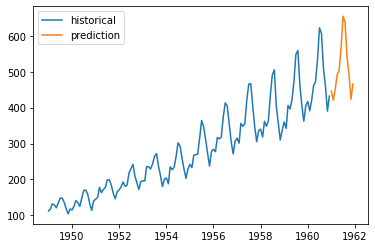

In [26]:
plt.plot(df, label='historical')
plt.plot(prediction, label='prediction')
plt.legend()
plt.show()